In [1]:
import warnings
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
warnings.filterwarnings('ignore')

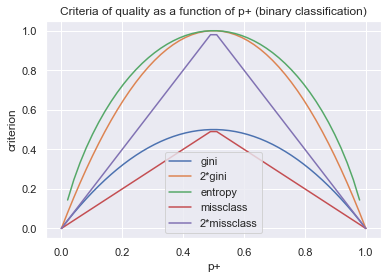

In [2]:
plt.figure(figsize=(6, 4))
xx = np.linspace(0, 1, 50)
plt.plot(xx, [2 * x * (1-x) for x in xx], label='gini')
plt.plot(xx, [4 * x * (1-x) for x in xx], label='2*gini')
plt.plot(xx, [-x * np.log2(x) - (1-x) * np.log2(1 - x)
              for x in xx], label='entropy')
plt.plot(xx, [1 - max(x, 1-x) for x in xx], label='missclass')
plt.plot(xx, [2 - 2 * max(x, 1-x) for x in xx], label='2*missclass')
plt.xlabel('p+')
plt.ylabel('criterion')
plt.title('Criteria of quality as a function of p+ (binary classification)')
plt.legend()

利用合成地数据集

In [3]:
# 第一类
np.random.seed(17)
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# 第二类
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)] #concat
train_labels = np.r_[train_labels, np.ones(100)]

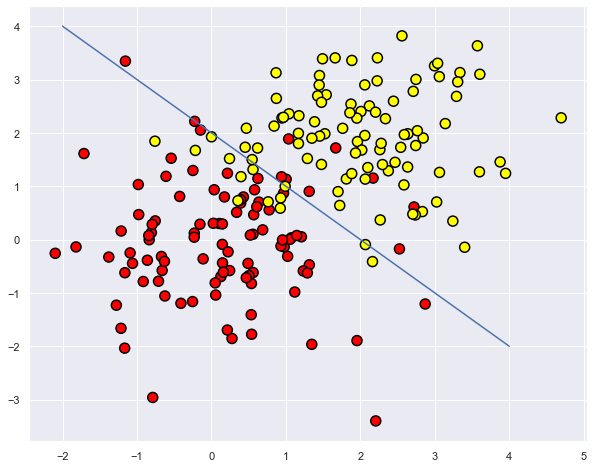

In [4]:
plt.figure(figsize=(10, 8))
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100,
            cmap='autumn', edgecolors='black', linewidth=1.5)
plt.plot(range(-2, 5), range(4, -3, -1))

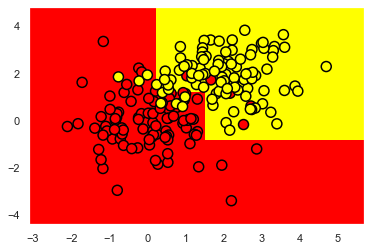

In [5]:
# 训练一颗决策树
from sklearn.tree import DecisionTreeClassifier

def get_grid(data):
    x_min,x_max=data[:,0].min()-1,data[:,0].max()+1
    y_min,y_max=data[:,1].min()-1,data[:,1].max()+1
    return np.meshgrid(np.arange(x_min,x_max,0.01),np.arange(y_min,y_max,0.01))

clf_tree = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=17)
clf_tree.fit(train_data,train_labels)
# 可视化
xx,yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx,yy,predicted,cmap='autumn')
plt.scatter(train_data[:,0],train_data[:,1],c=train_labels,s=100,
           cmap='autumn',edgecolors='black',linewidth=1.5)

In [7]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [7]:
data = pd.DataFrame({'Age': [17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33],
                     'Loan Default': [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1]})
data

,Age,Loan Default
0,17,1
1,64,0
2,18,1
3,20,0
4,38,1
5,49,0
6,55,0
7,25,1
8,29,1
9,31,0


In [8]:
data.sort_values('Age')

,Age,Loan Default
0,17,1
2,18,1
3,20,0
7,25,1
8,29,1
9,31,0
10,33,1
4,38,1
5,49,0
6,55,0


In [9]:
from sklearn.tree import export_graphviz